# Telco Churn Classification Project

Adam Talbot - 8/31/21

---

<img src="https://23x6xj3o92m9361dbu2ij362-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/thumbnail-3ac78ae8dc4ab8e78d3937d8a6b35326-1200x370.jpeg" alt="Iris" title="Iris Dataset" width="500" height="200" />

---

### Imports

---

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Custom module imports
import acquire as a
import prepare as p
import explore as e

---

## Plan

---

- [x] Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- [x] Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- [x] Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- [x] Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- [x] Establish a baseline accuracy and document well.
- [x] Train three different classification models.
- [x] Evaluate models on train and validate datasets.
- [x] Choose the model with that performs the best and evaluate that single model on the test dataset.
- [x] Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.
- [x] Document conclusions, takeaways, and next steps in the Final Report Notebook.


---

## Executive Summary

---

**Project Objectives/Goals**
- Find drivers for customer churn at Telco
- Construct a ML classification model that accurately predicts customer churn
- Document process well enough to be presented or read like a report
**Conclusions:**
- I found that my KNN Classification model best predicted churn when evaluated using accuracy and defining overfit as a >5% decrease in accuracy from train to validate evaluation.
    - 78% out-of-sample accuracy
- This model outperformed the baseline by 4.4%, so it has value.
**Next Steps:**
- Some initial exploration and statistical testing revealed that engineering some new features might help my models predict with even more accuracy, and with more time, I would like to test this hypothesis.
- Scaling numeric columns would likely improve performance for the KNN model. I would implement this with more time.
- Because of the imbalance of classes for the target variable, sampling methods might also improve model peformance. I would implement this with more time.
- I would explore further hyperparameter tuning with more time.

---

## Acquire

---

In [2]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [3]:
# lets see how many rows and columns we have
df.shape

(7043, 24)

In [4]:
# let's take a look at first 5 rows transposed for readability
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,3
contract_type_id,1,1,1,1,1
internet_service_type_id,3,3,3,3,3
customer_id,0030-FNXPP,0031-PVLZI,0098-BOWSO,0107-WESLM,0114-RSRRW
gender,Female,Female,Male,Male,Female
senior_citizen,0,0,0,0,0
partner,No,Yes,No,No,Yes
dependents,No,Yes,No,No,No
tenure,3,4,27,1,10
phone_service,Yes,Yes,Yes,Yes,Yes


In [5]:
# let's get some more info on our raw data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
# let's check out some summary statistics for our numerical columns in the raw data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
# several columns have 'No internet service' or 'No phone service' as a category, this seems redundant
# let's make sure we have info on phone and internet service before removing redundant info
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [8]:
df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [9]:
# let's take a look at an example of the redundancy for each service type
df.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [10]:
df.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

### Takeaways:
- data was successfully imported using SQL query the first time and using cached .csv copy of df after that
    - see `acquire.py` file in repo for code
- need to drop first four columns as they are database keys and don't add value
- need to change all binary categorical columns to a consistent format (some are being represented as integers while others with strings)
    - `senior_citizen` should be changed from integers of `0` and `1` to strings of `"Yes"` and `"No"` to be consistent with other binary categorical columns
    - Encoding of these categorical columns will take place later
- `total_charges` column is in object format and will need to be formatted to float
- some columns appear to contain redundant information and will cause unnecessary column inflation when encoding takes place
    - there is a column `internet_service_type` that tells you if they don't have internet but 6 other columns have a category for `"No internet service"`
        - need to change those other 6 columns to only have 2 categories of `"Yes"` or `"No"` to remove redundancy where those who don't have internet would be converted to `"No"` group
    - there is a column `phone_service` that tells you if they have phone service or not but there is another column `multiple_lines` that also has a `"No phone service"` category
        - need to change this other column to only have 2 categories of `"Yes"` or `"No"` to remove redundancy where those who don't have phone would be converted to `"No"` group
- *I will wait to plot distributions of individual variables until I have made these changes so that the information is meaningful*

---

## Prepare

---

### Clean

---

In [11]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [12]:
# let's take a look at cleaned data shape
df.shape

(7043, 20)

In [13]:
# let's take a look at cleaned data
df.head().T

,0,1,2,3,4
gender,Female,Female,Male,Male,Female
senior_citizen,No,No,No,No,No
partner,No,Yes,No,No,Yes
dependents,No,Yes,No,No,No
tenure,3,4,27,1,10
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,No,No,No,No
online_security,No,No,No,No,No
online_backup,No,No,No,No,No
device_protection,No,No,No,No,No


In [14]:
# let's make sure data types are correct for modified columns
print(f'Data type for senior_citizen column is now: {df.senior_citizen.dtype}.')
print(f'Data type for total_charges column is now: {df.total_charges.dtype}.')

Data type for senior_citizen column is now: object.
Data type for total_charges column is now: float64.


In [15]:
# let's make sure redundencies were taken care of for each service type
df.online_security.value_counts()

No     5024
Yes    2019
Name: online_security, dtype: int64

In [16]:
df.multiple_lines.value_counts()

No     4072
Yes    2971
Name: multiple_lines, dtype: int64

#### Takeaways:
- data was cleaned successfully using imported prepare.py module (see module in repo for code)
    - unneeded columns were successfully dropped
    - `senior_citizen` column was successfully modified
    - `total_charges` column data type was successfully cast to float
        - There were 11 values of `" "` in this column that all had values of `0` for tenure, so these columns were converted to value of `0`
    - 7 columns with redundancies were successfully modified according to observations and explanation above

---

### Missing Values/Imputation

---

In [17]:
# check to see if we have any missing values
df.isnull().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
internet_service_type    0
contract_type            0
payment_type             0
dtype: int64

#### Takeaways:
- There are no missing values in this cleaned data, therefore imputation is not necessary here.

---

### Individual Variable Distributions/Value Counts

---

In [18]:
# create a list of all numeric columns to use below in function
quant_vars = df.select_dtypes(include = ['number']).columns.tolist()

In [19]:
# create a list of all categorical columns to use below in function
cat_vars = df.select_dtypes(include = 'object').columns.tolist()

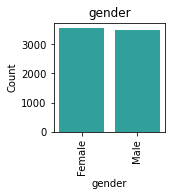

        gender  Count  Percent
Male    Female   3555    50.48
Female    Male   3488    49.52
_________________________________________________________________


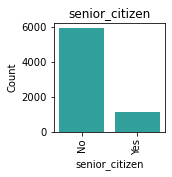

    senior_citizen  Count  Percent
No              No   5901    83.79
Yes            Yes   1142    16.21
_________________________________________________________________


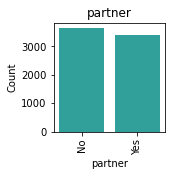

    partner  Count  Percent
No       No   3641     51.7
Yes     Yes   3402     48.3
_________________________________________________________________


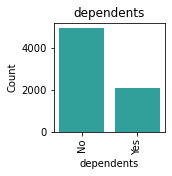

    dependents  Count  Percent
No          No   4933    70.04
Yes        Yes   2110    29.96
_________________________________________________________________


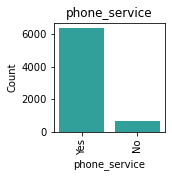

    phone_service  Count  Percent
Yes           Yes   6361    90.32
No             No    682     9.68
_________________________________________________________________


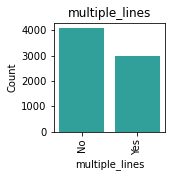

    multiple_lines  Count  Percent
No              No   4072    57.82
Yes            Yes   2971    42.18
_________________________________________________________________


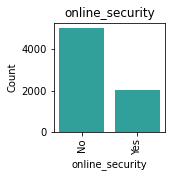

    online_security  Count  Percent
No               No   5024    71.33
Yes             Yes   2019    28.67
_________________________________________________________________


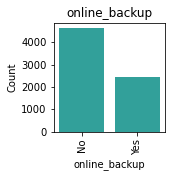

    online_backup  Count  Percent
No             No   4614    65.51
Yes           Yes   2429    34.49
_________________________________________________________________


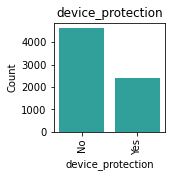

    device_protection  Count  Percent
No                 No   4621    65.61
Yes               Yes   2422    34.39
_________________________________________________________________


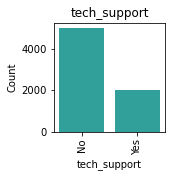

    tech_support  Count  Percent
No            No   4999    70.98
Yes          Yes   2044    29.02
_________________________________________________________________


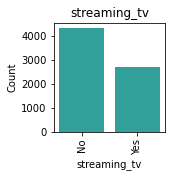

    streaming_tv  Count  Percent
No            No   4336    61.56
Yes          Yes   2707    38.44
_________________________________________________________________


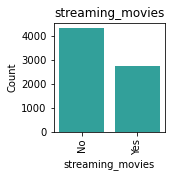

    streaming_movies  Count  Percent
No                No   4311    61.21
Yes              Yes   2732    38.79
_________________________________________________________________


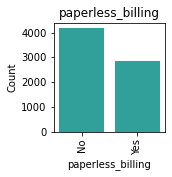

    paperless_billing  Count  Percent
Yes                No   4171    59.22
No                Yes   2872    40.78
_________________________________________________________________


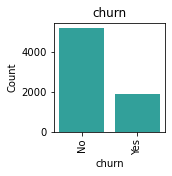

    churn  Count  Percent
No     No   5174    73.46
Yes   Yes   1869    26.54
_________________________________________________________________


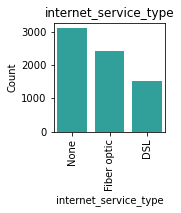

            internet_service_type  Count  Percent
Fiber optic                  None   3096    43.96
DSL                   Fiber optic   2421    34.37
None                          DSL   1526    21.67
_________________________________________________________________


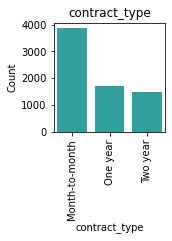

                 contract_type  Count  Percent
Month-to-month  Month-to-month   3875    55.02
Two year              One year   1695    24.07
One year              Two year   1473    20.91
_________________________________________________________________


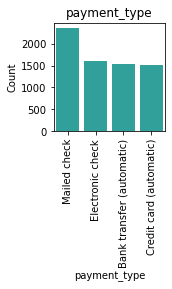

                                        payment_type  Count  Percent
Electronic check                        Mailed check   2365    33.58
Mailed check                        Electronic check   1612    22.89
Bank transfer (automatic)  Bank transfer (automatic)   1544    21.92
Credit card (automatic)      Credit card (automatic)   1522    21.61
_________________________________________________________________


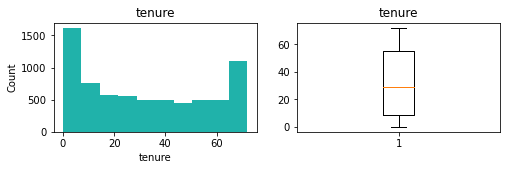

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


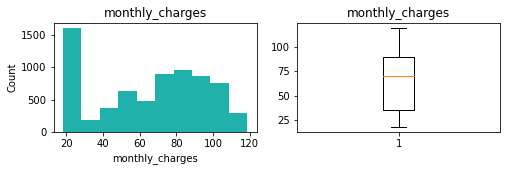

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


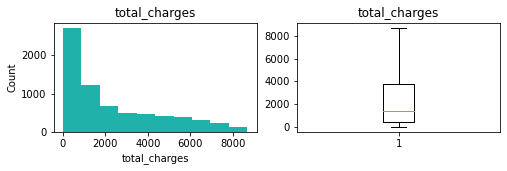

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64


In [20]:
# use explore_univariate function from imported explore.py module to take a look at individual variables to get high level view, look for outliers, etc.
e.explore_univariate(df, cat_vars, quant_vars)

#### Takeaways:
- 27% of customers are churning
- 55% of customers pay month-to-month
- Largest group of customers pay via mailed check
- Majority of customers (56%) pay via manual payment methods
- Tenure distribution shows peaks at extremes
- Monthly charges distribution shows peak at low end and then a semi normal distribution for rest of population
- Total charges distribution shows peak at lower end
- Don't see outliers on box plots for numeric columns

---

### Split

---

#### Split without encoding

In [21]:
# split the df before encoding to prepare for exploration using function from prepare.py
train, validate, test = p.split_telco(df)

In [22]:
# check proportions of splits
print(f'Proportion of train: {train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


In [23]:
# take a look at split
train.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


#### Split with encoding

In [24]:
# split data and encode to prep data for modeling using function from prepare.py
train_encoded, validate_encoded, test_encoded = p.dummy_and_split_telco(df)

In [25]:
# check proportions of splits
print(f'Proportion of train: {train_encoded.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {validate_encoded.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {test_encoded.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


In [26]:
# take a look at split
train_encoded.head().T

,6169,3290,3615,6309,856
tenure,72.0,28.00,5.00,39.00,45.00
monthly_charges,105.5,49.90,24.95,100.55,93.90
total_charges,7544.0,1410.25,100.40,3895.35,4200.25
gender_Male,0.0,0.00,1.00,1.00,1.00
senior_citizen_Yes,0.0,0.00,0.00,0.00,1.00
partner_Yes,1.0,1.00,1.00,0.00,0.00
dependents_Yes,0.0,1.00,0.00,1.00,0.00
phone_service_Yes,1.0,1.00,0.00,1.00,1.00
multiple_lines_Yes,1.0,1.00,0.00,1.00,1.00
online_security_Yes,1.0,0.00,0.00,0.00,0.00


#### Takeaways:
- data was successfully split using two functions from `prepare.py` module
    - see code in `prepare.py` file in repo
    - one split kept categorical variables as-is
        - these splits will be used in exploration
    - another split encoded all categorical variables so that only numbers appeared as values
        - these splits will be used for modeling
        - for these splits, all redundant columns were dropped (e.g. for 2 categories, 1 column remains, for 3 categories, 2 columns remain, etc.)
    - `random state` was defined for all splits to ensure replicability

---

## Explore

---

### Univariate

**Check univariate info to make sure resembles that of whole dataset to make sure split randomization and stratification worked properly**

In [27]:
# create a list of all numeric columns to use below in function
quant_vars = train.select_dtypes(include = ['number']).columns.tolist()
# quant_vars

In [28]:
# create a list of all categorical columns to use below in function
cat_vars = train.select_dtypes(include = 'object').columns.tolist()
# cat_vars

In [29]:
# use explore_univariate function from imported explore.py module to take a look at individual variables and compare results to those from from entire dataset
# e.explore_univariate(train, cat_vars, quant_vars) 
# I am not going to reprint all these again for the presentation since it takes up a lot of real estate on the notebook

#### Takeaways:
- distributions looks similar, it appears split worked properly

---

### Bivariate

We will use our explore_bivariate(train, target, cat_vars, quant_vars) function that takes in a dataframe, the name of the binary target variable, a list of the names of the categorical variables, a list of the names of the quantitative variables. Each feature is analyzed with respect to the binary target variable. For each categorical variable, it returns the results from a chi-square test that is run and a barplot. For each quantitative variable, descriptive statistics are computed with respect to the target variable and boxen plots are created. Difference in means of the quantitative variables are tested between each class in the target using Mann-Whitney.

**P value threshold for all statistical testing will be 0.05, meaning we will accept results as statistically significant if p < 0.05**

**For churn, 1 = 'Yes' and 0 = 'No'**

---

#### Categorical

**Chi Square Test between churn and all other categorial variables**

In [30]:
# we need to remove the target variable from our list of cat_vars
cat_vars.pop(13)

'churn'

In [31]:
# make a copy of train and modify target column since we need churn to be 1 or 0 for the function that will be used
train_temp = train.copy()
train_temp.churn = np.where(train_temp.churn == 'Yes', 1, 0)

gender 
_____________________

       chi2   p-value  degrees of freedom
0  0.116092  0.733312                   1




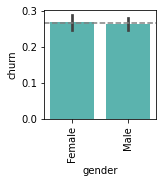


_____________________

senior_citizen 
_____________________

        chi2       p-value  degrees of freedom
0  126.71297  2.146819e-29                   1




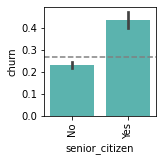


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  85.438559  2.390140e-20                   1




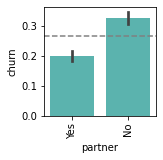


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  125.315832  4.340610e-29                   1




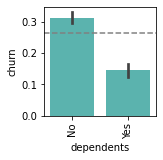


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  1.837203  0.175279                   1




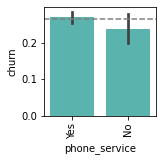


_____________________

multiple_lines 
_____________________

        chi2   p-value  degrees of freedom
0  11.507626  0.000693                   1




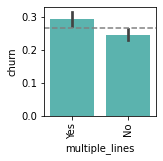


_____________________

online_security 
_____________________

        chi2       p-value  degrees of freedom
0  122.15068  2.139555e-28                   1




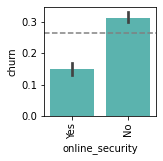


_____________________

online_backup 
_____________________

        chi2       p-value  degrees of freedom
0  28.759295  8.195561e-08                   1




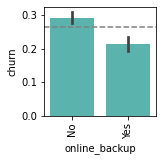


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  21.827182  0.000003                   1




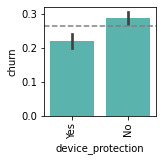


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  114.193717  1.181803e-26                   1




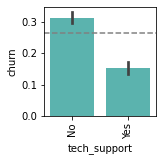


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  18.401119  0.000018                   1




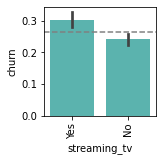


_____________________

streaming_movies 
_____________________

        chi2   p-value  degrees of freedom
0  13.076863  0.000299                   1




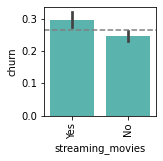


_____________________

paperless_billing 
_____________________

         chi2       p-value  degrees of freedom
0  148.148111  4.403064e-34                   1




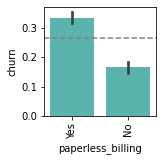


_____________________

internet_service_type 
_____________________

         chi2       p-value  degrees of freedom
0  440.801802  1.910315e-96                   2




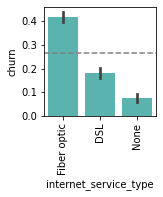


_____________________

contract_type 
_____________________

         chi2        p-value  degrees of freedom
0  673.953198  4.496997e-147                   2




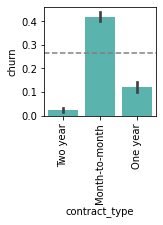


_____________________

payment_type 
_____________________

         chi2       p-value  degrees of freedom
0  412.264701  4.880175e-89                   3




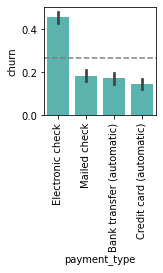


_____________________



In [32]:
# run chi^2 test for all cat vars and target and plot comparison
for cat in cat_vars:
    e.explore_bivariate_categorical(train_temp, 'churn', cat)

In [33]:
# create null hypotheses
counter = 1

print('Null Hypotheses:')
for cat in cat_vars:
    print(f'{counter}. H_0: Churn is independent of {cat}')
    counter += 1

Null Hypotheses:
1. H_0: Churn is independent of gender
2. H_0: Churn is independent of senior_citizen
3. H_0: Churn is independent of partner
4. H_0: Churn is independent of dependents
5. H_0: Churn is independent of phone_service
6. H_0: Churn is independent of multiple_lines
7. H_0: Churn is independent of online_security
8. H_0: Churn is independent of online_backup
9. H_0: Churn is independent of device_protection
10. H_0: Churn is independent of tech_support
11. H_0: Churn is independent of streaming_tv
12. H_0: Churn is independent of streaming_movies
13. H_0: Churn is independent of paperless_billing
14. H_0: Churn is independent of internet_service_type
15. H_0: Churn is independent of contract_type
16. H_0: Churn is independent of payment_type


In [34]:
# create null hypotheses
counter = 1

print('Alternative Hypotheses:')
for cat in cat_vars:
    print(f'{counter}. H_0: Churn is not independent of {cat}')
    counter += 1

Alternative Hypotheses:
1. H_0: Churn is not independent of gender
2. H_0: Churn is not independent of senior_citizen
3. H_0: Churn is not independent of partner
4. H_0: Churn is not independent of dependents
5. H_0: Churn is not independent of phone_service
6. H_0: Churn is not independent of multiple_lines
7. H_0: Churn is not independent of online_security
8. H_0: Churn is not independent of online_backup
9. H_0: Churn is not independent of device_protection
10. H_0: Churn is not independent of tech_support
11. H_0: Churn is not independent of streaming_tv
12. H_0: Churn is not independent of streaming_movies
13. H_0: Churn is not independent of paperless_billing
14. H_0: Churn is not independent of internet_service_type
15. H_0: Churn is not independent of contract_type
16. H_0: Churn is not independent of payment_type


**Conclusions:**
1. We **fail to reject the null**, evidence suggests that `gender` is independent of `churn`
2. We **reject the null**, evidence suggests that `senior_citizen` is not independent of `churn`
3. We **reject the null**, evidence suggests that `partner` is not independent of `churn`
4. We **reject the null**, evidence suggests that `dependents` is not independent of `churn`
5. We **fail to reject the null**, evidence suggests that `phone_service` is independent of `churn`
6. We **reject the null**, evidence suggests that `multiple_lines` is not independent of `churn`
7. We **reject the null**, evidence suggests that `online_security` is not independent of `churn`
8. We **reject the null**, evidence suggests that `online_backup` is not independent of `churn`
9. We **reject the null**, evidence suggests that `device_protection` is not independent of `churn`
10. We **reject the null**, evidence suggests that `tech_support` is not independent of `churn`
11. We **reject the null**, evidence suggests that `streaming_tv` is not independent of `churn`
12. We **reject the null**, evidence suggests that `streaming_movies` is not independent of `churn`
13. We **reject the null**, evidence suggests that `paperless_billing` is not independent of `churn`
14. We **reject the null**, evidence suggests that `internet_service_type` is not independent of `churn`
15. We **reject the null**, evidence suggests that `contract_type` is not independent of `churn`
16. We **reject the null**, evidence suggests that `payment_type` is not independent of `churn`

##### Takeaways:
- All categorical columns except `gender` and `phone_service` will be used to predict target due to evidence suggesting all others are not independent of `churn` and therefore they could be considered drivers

---

#### Numerical

**For each quantitative column and churn subgroup, we will display a boxen plot, summary statistics, and the results of a Mann-Whitney Test to compare means**

tenure 
____________________



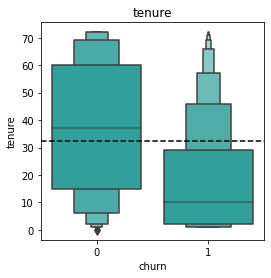

        count       mean        std  min   25%   50%    75%   max
churn                                                            
0      3104.0  37.432990  24.087859  0.0  15.0  37.0  60.25  72.0
1      1121.0  18.036574  19.485285  1.0   2.0  10.0  29.00  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2566280.0, pvalue=2.2758832595981456e-123)

____________________

monthly_charges 
____________________



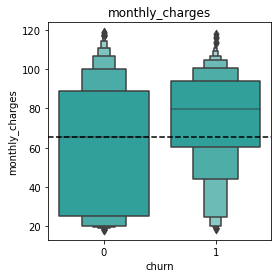

        count       mean        std    min   25%    50%   75%     max
churn                                                                
0      3104.0  61.755751  31.071276  18.25  25.1  65.25  89.0  118.75
1      1121.0  75.056646  24.435249  18.95  60.4  79.90  94.2  117.80 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1313871.5, pvalue=4.646157723850262e-34)

____________________

total_charges 
____________________



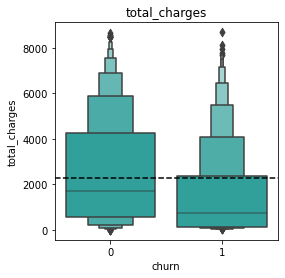

        count         mean          std   min       25%      50%        75%  \
churn                                                                         
0      3104.0  2565.274887  2330.960610   0.0  578.1625  1724.05  4264.4375   
1      1121.0  1546.124532  1883.590483  19.1  135.0000   723.40  2354.8000   

           max  
churn           
0      8672.45  
1      8684.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2254399.0, pvalue=6.381351636087388e-49)

____________________



In [35]:
# lets try this for numerical bivariate
for var in quant_vars:
    e.explore_bivariate_quant(train_temp, 'churn', var)

In [36]:
# create null hypotheses
counter = 1

print('Null Hypotheses:')
for var in quant_vars:
    print(f'{counter}. H_0: Mean {var} values are equal for churn subgroups')
    counter += 1

Null Hypotheses:
1. H_0: Mean tenure values are equal for churn subgroups
2. H_0: Mean monthly_charges values are equal for churn subgroups
3. H_0: Mean total_charges values are equal for churn subgroups


In [37]:
# create alternative hypotheses
counter = 1

print('Alternative Hypotheses:')
for var in quant_vars:
    print(f'{counter}. H_a: Mean {var} values are not equal for churn subgroups')
    counter += 1

Alternative Hypotheses:
1. H_a: Mean tenure values are not equal for churn subgroups
2. H_a: Mean monthly_charges values are not equal for churn subgroups
3. H_a: Mean total_charges values are not equal for churn subgroups


**Conclusions:**
1. We **reject the null**, evidence suggests that mean `tenure` values are different for `churn` subgroups
2. We **reject the null**, evidence suggests that mean `monthly_charges` values are different for `churn` subgroups
3. We **reject the null**, evidence suggests that mean `total_charges` values are different for `churn` subgroups

##### Takeaways:
- All quantitative columns will be used to predict the target since the differences in the mean values for the `churn` subgroups are statistically significant

---

### Multivariate

Let's take a look at how continuous variables interact with each other and the target variable.

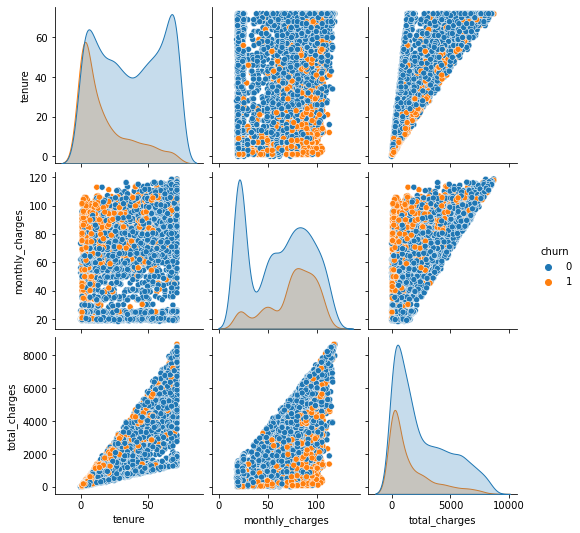

In [38]:
pair = sns.pairplot(data=train_temp, vars=quant_vars, hue="churn")
plt.show()

#### Takeaways:
- Most customers are churning early on in their tenure
- Most churn occurs among customers with low tenure and high monthly charges
- Distribution of monthly charges for those that churn and don't churn is similar except for more non-churning customers having lower monthly charges (spike at left side)
- Most churn occurs with low total charges (low tenure) and high monthly charges
- The distributions of total charges for those that churn and those that don't are similar
- Most of our customers have low total charges, but we have a good amount that have high tenure, so a good portion of our loyal customers must have very low monthly charges (very simple, inexpensive plans)
- **These observations won't be used to choose features for the model at this time, but could be used to create new features or to simply provide recommendations to the stakeholder on customer groups to target moving forward**
    - These observations could also be used to engineer new features for future projects

---

## Model/Evaluate

---

- **Accuracy will be used to evaluate all models**
- **A difference of 0.05 between test and validate accuracy will be threshold for overfit**

#### Baseline

In [39]:
# we will set our baseline to the most common churn outcome observed in train dataset
train_encoded.churn_Yes.value_counts(normalize=True)

0    0.734675
1    0.265325
Name: churn_Yes, dtype: float64

In [40]:
print(f'Baseline accuracy is we predicted that no customers churn, this accuracy would be: {round(train_encoded.churn_Yes.value_counts(normalize=True)[0],2)}.')

Baseline accuracy is we predicted that no customers churn, this accuracy would be: 0.73.


#### X and y

In [41]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train_encoded.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_train = train_encoded.churn_Yes

X_validate = validate_encoded.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_validate = validate_encoded.churn_Yes

X_test = test_encoded.drop(columns=['churn_Yes', 'gender_Male', 'phone_service_Yes'])
y_test = test_encoded.churn_Yes

In [42]:
# check proportions of splits
print(f'Proportion of train: {X_train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {X_validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {X_test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


---

### Decision Tree

**Compare max depths using for loop**

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.793373,0.783534,0.010
3,0.793373,0.783534,0.010
4,0.800947,0.777857,0.023
5,0.804497,0.784954,0.020
6,0.816331,0.787083,0.029
7,0.829822,0.794180,0.036
8,0.846627,0.787793,0.059
9,0.866509,0.775727,0.091


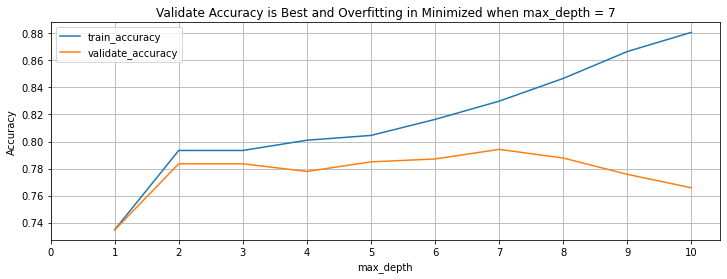

In [43]:
# Let's compare in-sample to out-of-sample for different max depths using a for loop
metrics = []

for i in range(1, 11):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized when max_depth = 7')


df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `7`
    - Accuracy for this model when evaluated on train is: `0.830`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### Random Forest

**Compare max depths using for loop**
- After experimenting with max depth, min samples per leaf, n estimators, it was discovered that highest accuracy with least amount of overfitting was achieved when only modifying max depth

,train_accuracy,validate_accuracy,difference
max_depth,,,
1,0.734675,0.734564,0.000
2,0.762367,0.763662,-0.001
3,0.786036,0.784954,0.001
4,0.800473,0.785664,0.015
5,0.807574,0.787083,0.020
6,0.819645,0.791341,0.028
7,0.835030,0.788502,0.047
8,0.843077,0.794180,0.049
9,0.865325,0.789922,0.075


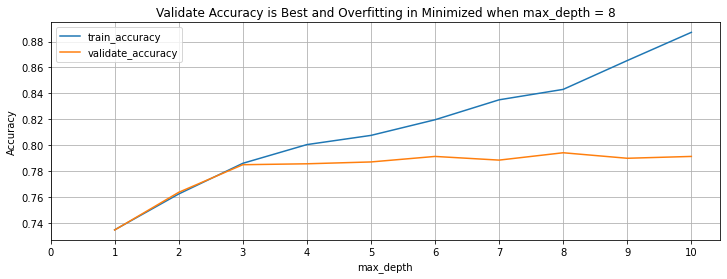

In [44]:
metrics = []

for i in range(1, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)

# plot the data
df.set_index('max_depth', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized when max_depth = 8')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best max depth value without crossing threshold for overfit is `8`
    - Accuracy for this model when evaluated on train is: `0.843`
    - Accuracy for this model when evaluated on validate is: `0.794`

---

### Logistic Regression

**Compare C values using for loop**

,train_accuracy,validate_accuracy,difference
C,,,
0.1,0.802367,0.794180,0.008
0.2,0.802130,0.794180,0.008
0.3,0.802367,0.797729,0.005
0.4,0.802367,0.798439,0.004
0.5,0.802367,0.797729,0.005
0.6,0.802367,0.797019,0.005
0.7,0.802367,0.797019,0.005
0.8,0.802130,0.797019,0.005
0.9,0.802130,0.797019,0.005


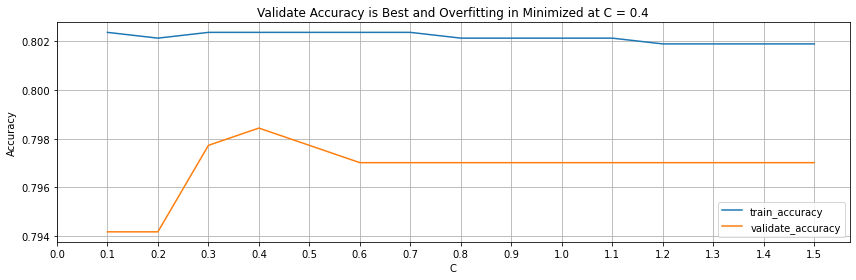

In [46]:
metrics = []

# loop through different values of C
for c in np.arange(0.1, 1.6, 0.1):
            
    # define the thing
    logit = LogisticRegression(C=c, random_state=123)
    
    # fit the thing (remember only fit on training data)
    logit.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = logit.score(X_train, y_train)
    validate_accuracy = logit.score(X_validate, y_validate)
    
    output = {
        "C": c,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('C', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 1.6, 0.1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at C = 0.4')
plt.tight_layout()

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best C value without crossing threshold for overfit is `0.4`
    - Accuracy for this model when evaluated on train is: `0.802`
    - Accuracy for this model when evaluated on validate is: `0.798`

---

### KNN

**Compare k values using for loop**

,train_accuracy,validate_accuracy,difference
k,,,
1,0.998580,0.721079,0.278
2,0.859408,0.764372,0.095
3,0.859172,0.762952,0.096
4,0.828876,0.781405,0.047
5,0.826509,0.778566,0.048
6,0.817751,0.795600,0.022
7,0.817278,0.794180,0.023
8,0.815858,0.799858,0.016
9,0.814675,0.800568,0.014


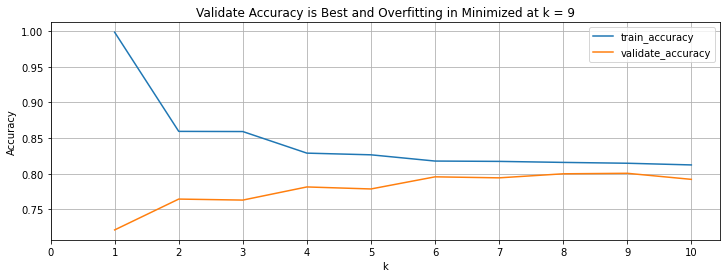

In [45]:
metrics = []

# loop through different values of k
for k in range(1, 11):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
df = pd.DataFrame(metrics)

# plot the data
df.set_index('k', inplace=True)
df.plot(figsize = (12,4))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid(b=True)
plt.title('Validate Accuracy is Best and Overfitting in Minimized at k = 9')

df["difference"] = round(df.train_accuracy - df.validate_accuracy, 3)
df

#### Takeaways:
- Best k value without crossing threshold for overfit is `9`
    - Accuracy for this model when evaluated on train is: `0.815`
    - Accuracy for this model when evaluated on validate is: `0.801`

---

### Evaluate Best Model on Test

**KNN Model has best accuracy while minimizing overfit**

In [47]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
train_accuracy = knn.score(X_train, y_train)
validate_accuracy = knn.score(X_validate, y_validate)
test_accuracy = knn.score(X_test, y_test)

print(f'The best performing classification model was the KNN model with a k value of 9.\n\
The train accuracy is: {train_accuracy:.3f}\n\
The validate accuracy is: {validate_accuracy:.3f}\n\
The test accuracy is: {test_accuracy:.3f}\n\
The baseline accuracy is: {train_encoded.churn_Yes.value_counts(normalize=True)[0]:.3f}\n\
This model outperforms the basline by: {(test_accuracy - train_encoded.churn_Yes.value_counts(normalize=True)[0]):.3f}') 

The best performing classification model was the KNN model with a k value of 9.
The train accuracy is: 0.815
The validate accuracy is: 0.801
The test accuracy is: 0.779
The baseline accuracy is: 0.735
This model outperforms the basline by: 0.044


---

#### Create Predictions CSV file

In [48]:
y_pred_test = knn.predict(X_test) # get predicted values for X_test
proba_test = knn.predict_proba(X_test) # get probability of churn for X_test
proba_df = pd.DataFrame(proba_test, columns=['proba_0', 'proba_1']) # convert to df and name columns for probabilities
reset_test = X_test.reset_index() # reset index on X_test for concatenation
test_proba_df = pd.concat([reset_test, proba_df], axis=1) # concat X_test with probabilities from model
test_proba_df['predicted'] = y_pred_test # add column for predicted values from model
test_proba_df = test_proba_df[['index', 'proba_0', 'proba_1', 'predicted']] # only keep necessary columns
df = a.get_telco_data() # pull in original data to use to get customer_id values using original index
id_prob_pred = test_proba_df.merge(df, left_on='index', right_index=True) # merge two dfs using original index to get customer_id column
id_prob_pred = id_prob_pred[['customer_id', 'proba_0', 'proba_1', 'predicted']] # only keep necessary columns
id_prob_pred.set_index('customer_id', inplace = True) # set customer_id as index to avoid extra column in .csv
id_prob_pred.to_csv('predictions.csv') # export to .csv file in current directory

---

## Conclusions and Next Steps

---

**Conclusions:**
- I found that my KNN Classification model best predicted churn when evaluated using accuracy and defining overfit as a >5% decrease in accuracy from train to validate evaluation.
    - 78% out-of-sample accuracy
- This model outperformed the baseline by 4.4%, so it has value.
**Next Steps:**
- Some initial exploration and statistical testing revealed that engineering some new features might help my models predict with even more accuracy, and with more time, I would like to test this hypothesis.
- Scaling numeric columns would likely improve performance for the KNN model. I would implement this with more time.
- Because of the imbalance of classes for the target variable, sampling methods might also improve model peformance. I would implement this with more time.
- I would explore further hyperparameter tuning with more time.